In [2]:
#relevant imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

import os 
import glob

In [5]:
#aggregating collected data
paths = glob.glob('./../data/BTC/BTC*.zip')

full_dataset = None

for i in range(len(paths)):
    if full_dataset is None:
        full_dataset = pd.read_csv('./../data/BTC/BTC_Book_' + str(i) + '.zip', 
                                   compression = 'zip', index_col = 0, parse_dates = True)
    else:
        app_data = pd.read_csv('./../data/BTC/BTC_Book_' + str(i) + '.zip', 
                               compression = 'zip', index_col = 0, parse_dates = True)
        full_dataset = full_dataset.append(app_data)
        
full_dataset.head(1)        

# full_dataset = pd.read_csv('./../data/BTC/BTC_Book_0.zip',
#                            compression = 'zip', index_col = 0, parse_dates = True)

,Sequence,Bid_1_Price,Bid_1_Size,Bid_1_Trades,Bid_2_Price,Bid_2_Size,Bid_2_Trades,Bid_3_Price,Bid_3_Size,Bid_3_Trades,...,Ask_47_Trades,Ask_48_Price,Ask_48_Size,Ask_48_Trades,Ask_49_Price,Ask_49_Size,Ask_49_Trades,Ask_50_Price,Ask_50_Size,Ask_50_Trades
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-03 17:06:34.424123-04:00,13321475728,6708.69,0.44705,1,6705.57,0.433865,1,6705.56,3.8,1,...,1,6741.24,1.334,1,6743.0,0.058299,1,6743.06,0.927,1


In [6]:
mid_price = pd.DataFrame((full_dataset['Bid_1_Price'] + full_dataset['Ask_1_Price'])/2, columns = ['mid_price'])
mid_price.head()

,mid_price
Timestamp,
2020-04-03 17:06:34.424123-04:00,6708.695
2020-04-03 17:06:35.388369-04:00,6708.695
2020-04-03 17:06:36.414534-04:00,6708.695
2020-04-03 17:06:37.400652-04:00,6708.695
2020-04-03 17:06:38.408623-04:00,6708.695


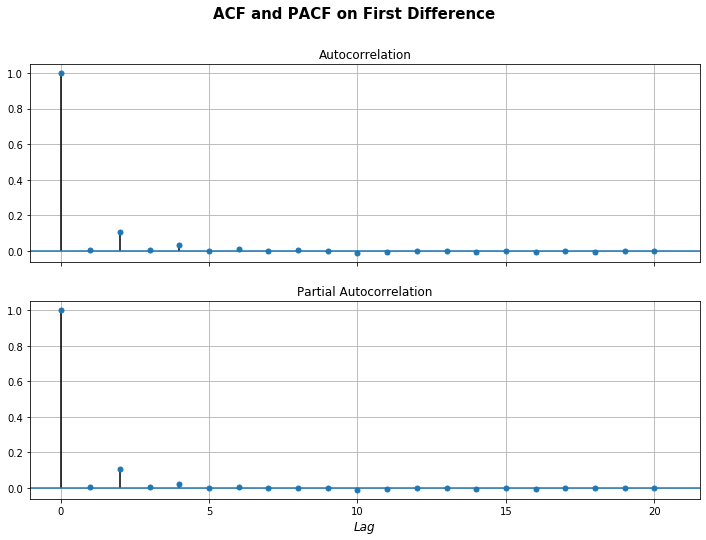

In [16]:
#Plotting ACF
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(12,8), sharex = True)
sm.graphics.tsa.plot_acf(mid_price['mid_price'].diff(1)[1:], lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(mid_price['mid_price'].diff(1)[1:], lags=20, ax=ax[1])
ax[0].grid('on')
ax[1].grid('on')
ax[1].set_xlabel('Lag', fontsize = 12, style = 'italic')
fig.suptitle("ACF and PACF on First Difference", fontsize = 15, weight = 'bold')
fig.savefig('ARIMA_ACF_PACF.png')
pass

## (2,1,2) is the best (p,d,q) according to AIC, BIC, MSE

In [ ]:
p_values = [1,2,3]
d_values = [1,2]
q_values = [1,2,3]

for p in p_values:
    for d in d_values:
        for q in q_values:
            model = sm.tsa.statespace.SARIMAX(endog = mid_price.values, exog = None, order = (p,d,q))
            mf = model.fit()
            print(str((p,d,q)), " MSE:", mf.mse, " AIC:", mf.aic, "BIC:", mf.bic)

C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 0, 1)  MSE: 50.069823329939844  AIC: 2083087.930246077 BIC: 2083123.0917548742


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 0, 2)  MSE: 50.058398488834804  AIC: 2063809.282181307 BIC: 2063856.1641930365


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 0, 3)  MSE: 50.06001214910051  AIC: 2066860.665454519 BIC: 2066919.2679691808
(1, 1, 1)  MSE: 50.06162631633017  AIC: 2068472.5585359908 BIC: 2068507.720041489
(1, 1, 2)  MSE: 50.05778119795816  AIC: 2062312.3777569735 BIC: 2062359.2597643044
(1, 1, 3)  MSE: 50.057531761195854  AIC: 2061913.18560249 BIC: 2061971.7881116536
(1, 2, 1)  MSE: 62.43703251804829  AIC: 2072202.1448343121 BIC: 2072237.3063365114
(1, 2, 2)  MSE: 62.43523395296661  AIC: 2069340.458804163 BIC: 2069387.3408070952


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 2, 3)  MSE: 62.43086025509467  AIC: 2062336.9437681374 BIC: 2062395.5462718026


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1)  MSE: 50.063963997847  AIC: 2072235.4635387706 BIC: 2072282.3455505


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 0, 2)  MSE: 50.0639690126807  AIC: 2072277.2154333747 BIC: 2072335.8179480366


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 0, 3)  MSE: 50.05791945532663  AIC: 2062559.5049854675 BIC: 2062629.828003062
(2, 1, 1)  MSE: 50.05745635970623  AIC: 2061789.875667847 BIC: 2061836.7576751779
(2, 1, 2)  MSE: 50.0571365576264  AIC: 2061277.1821330448 BIC: 2061335.7846422084
(2, 1, 3)  MSE: 50.05713075050545  AIC: 2061269.8331229647 BIC: 2061340.156133961
(2, 2, 1)  MSE: 62.4305595481591  AIC: 2061851.3847847236 BIC: 2061898.266787656
(2, 2, 2)  MSE: 62.43053487748899  AIC: 2061813.7606634332 BIC: 2061872.3631670985


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 2, 3)  MSE: 62.430657152657076  AIC: 2062010.7245607127 BIC: 2062081.047565111


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 1)  MSE: 50.064011430711545  AIC: 2072353.7907487748 BIC: 2072412.3932634366


C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 2)  MSE: 50.06339382898962  AIC: 2071486.2850458845 BIC: 2071556.608063479


In [ ]:
endog = pd.DataFrame(mid_price.values)

# Setup forecasts
nforecasts = 1
forecasts = [] #{}

# Get the number of initial training observations
nobs = len(endog)
n_init_training = 700000

# Create model for initial training sample, fit parameters
init_training_endog = endog.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(init_training_endog, order=(2, 1, 2))
res = mod.fit()

# Save initial forecast
#forecasts[init_training_endog.index[-1]] = res.forecast(steps=nforecasts)
forecasts.append(res.forecast(steps=nforecasts).values[0])

# Step through the rest of the sample
for t in range(n_init_training, nobs):
    # Update the results by appending the next observation
    updated_endog = endog.iloc[t:t+1]
    res = res.extend(updated_endog)

    # Save the new set of forecasts
    #forecasts[updated_endog.index[0]] = res.forecast(steps=nforecasts)
    forecasts.append(res.forecast(steps=nforecasts).values[0])

# Combine all forecasts into a dataframe
#forecasts = pd.concat(forecasts, axis=1)

#print(forecasts.iloc[:5, :5])
forecasts = np.asarray(forecasts)

In [3]:
forecasts = np.load('ARIMA_forecasts.npy')

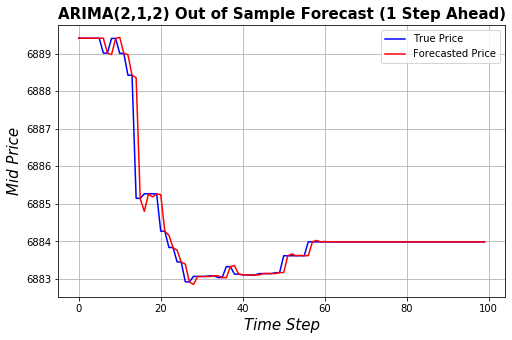

In [28]:
start = 0
window = 100

fig, ax = plt.subplots(1,1, figsize = (8,5))
ax.plot(mid_price[700000:].values[start:start+window], color = 'blue')
ax.plot(forecasts[:len(forecasts)-1][start:start+window], color = 'red')
ax.set_title('ARIMA(2,1,2) Out of Sample Forecast (1 Step Ahead)', fontsize = 15, weight = 'bold')
ax.set_ylabel('Mid Price', fontsize = 15, style = 'italic')
ax.set_xlabel('Time Step', fontsize = 15, style = 'italic')
ax.legend(['True Price', 'Forecasted Price'])
ax.grid('on')

fig.savefig('ARIMA_Forecast.png')

In [11]:
sd = mid_price['mid_price'].diff(1).shift(-1).std()
sd = 0

def return_cat(x, stdev):
    if x > (0 + stdev):
        return 2
    if x < (0 - stdev):
        return 0
    else:
        return 1
    
test_data = pd.DataFrame(mid_price[700000:].values, columns = ['mid_price'])
test_data['mid_price_pred'] = forecasts[:len(forecasts)-1]
test_data['mid_price_shift'] = test_data['mid_price'].shift(1)
test_data['mp_ret'] = test_data['mid_price'].diff(1)
test_data['mp_pred_ret'] = test_data['mid_price_pred'] - test_data['mid_price_shift']
test_data['mp_ret_cat'] = test_data['mp_ret'].apply(return_cat, args = (sd,))
test_data['mp_pred_ret_cat'] = test_data['mp_pred_ret'].apply(return_cat, args = (sd,))
test_data = test_data.dropna()

test_data

,mid_price,mid_price_pred,mid_price_shift,mp_ret,mp_pred_ret,mp_ret_cat,mp_pred_ret_cat
1,6889.410,6889.410086,6889.410,0.0,8.610497e-05,1,2
2,6889.410,6889.409998,6889.410,0.0,-2.276322e-06,1,0
3,6889.410,6889.410023,6889.410,0.0,2.329330e-05,1,2
4,6889.410,6889.410000,6889.410,0.0,-1.979870e-07,1,0
5,6889.410,6889.410006,6889.410,0.0,6.308866e-06,1,2
...,...,...,...,...,...,...,...
209361,6882.055,6882.083083,6882.055,0.0,2.808300e-02,1,2
209362,6882.055,6882.055737,6882.055,0.0,7.371209e-04,1,2
209363,6882.055,6882.062624,6882.055,0.0,7.623679e-03,1,2
209364,6882.055,6882.055337,6882.055,0.0,3.368570e-04,1,2


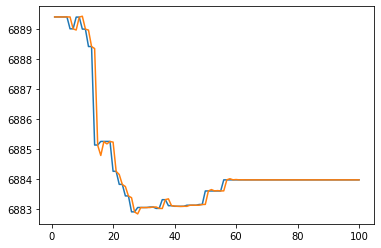

In [12]:
start = 0
window = 100
plt.plot(test_data[start:start+window][['mid_price', 'mid_price_pred']])

[[14343.   191. 10925.]
 [58914. 15448. 81091.]
 [11540.   205. 16708.]]


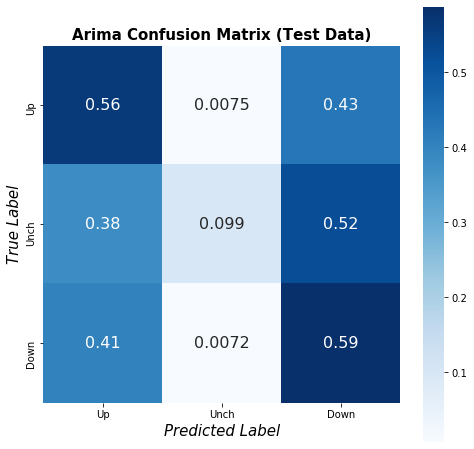

In [13]:
from sklearn.metrics import confusion_matrix

Y_true = test_data['mp_ret_cat'].values
Y_pred = test_data['mp_pred_ret_cat'].values

cm = confusion_matrix(Y_true, Y_pred)
cm=cm.astype(float)
print(cm)

cm[0,:] = np.true_divide(cm[0,:], cm[0,:].sum())
cm[1,:] = np.true_divide(cm[1,:], cm[1,:].sum())
cm[2,:] = np.true_divide(cm[2,:], cm[2,:].sum())


import seaborn as sns

fig, axs = plt.subplots(1, figsize = (8,8))
axs = sns.heatmap(cm, xticklabels=['Up','Unch', 'Down'], 
                  yticklabels=['Up','Unch', 'Down'], annot = True,square=True, 
                  cmap=plt.cm.Blues, annot_kws={"size":16})

axs.set_title("Arima Confusion Matrix (Test Data)", fontsize = 15, weight = 'bold')
axs.set_xlabel('Predicted Label', fontsize = 15, style = 'italic')
axs.set_ylabel('True Label', fontsize = 15, style = 'italic')
fig.savefig('CM__ARIMA.png')